# Example of optimizing a convex function

In [1]:
from mango.tuner import Tuner
from scipy.stats import uniform

In [5]:

param_dict = {
    'x': uniform(-5, 10),
    'y': uniform(-5, 10),
}

    
def objfunc(args_list):
    hyper_evaluated = []
    objective_evaluated = []
    for hyper_par in args_list:
        x = hyper_par['x']
        y = hyper_par['y']
        objective = -(x**2 + y**2)
        objective_evaluated.append(objective)
        hyper_evaluated.append(hyper_par)
    return hyper_evaluated, objective_evaluated

In [24]:
conf_Dict = dict()
conf_Dict['batch_size'] = 1
conf_Dict['num_iteration'] = 100
conf_Dict['domain_size'] = 1000
conf_Dict['initial_random']=5

In [25]:
tuner = Tuner(param_dict, objfunc,conf_Dict)
print('Tuner Configuration')
print(tuner.getConf())

Tuner Configuration
{'param_dict': {'x': <scipy.stats._distn_infrastructure.rv_frozen object at 0x115e5a940>, 'y': <scipy.stats._distn_infrastructure.rv_frozen object at 0x115e5ae48>}, 'userObjective': <function objfunc at 0x115e51bf8>, 'domain_size': 1000, 'initial_random': 5, 'num_iteration': 100, 'objective': 'maximize', 'batch_size': 1, 'optimizer': 'Bayesian'}


In [26]:
results = tuner.maximize()

In [27]:
print('best parameters:',results['best_params'])
print('best objective:',results['best_objective'])

best parameters: {'x': -0.004202579384698701, 'y': -0.029018477974417145}
best objective: -0.0008597337374364275


In [28]:
# Actual Opt Values
x_opt = 0
y_opt = 0

In [29]:
print("Real x_opt and y_opt are:",x_opt,y_opt)

Real x_opt and y_opt are: 0 0


# Actual variation in the objective

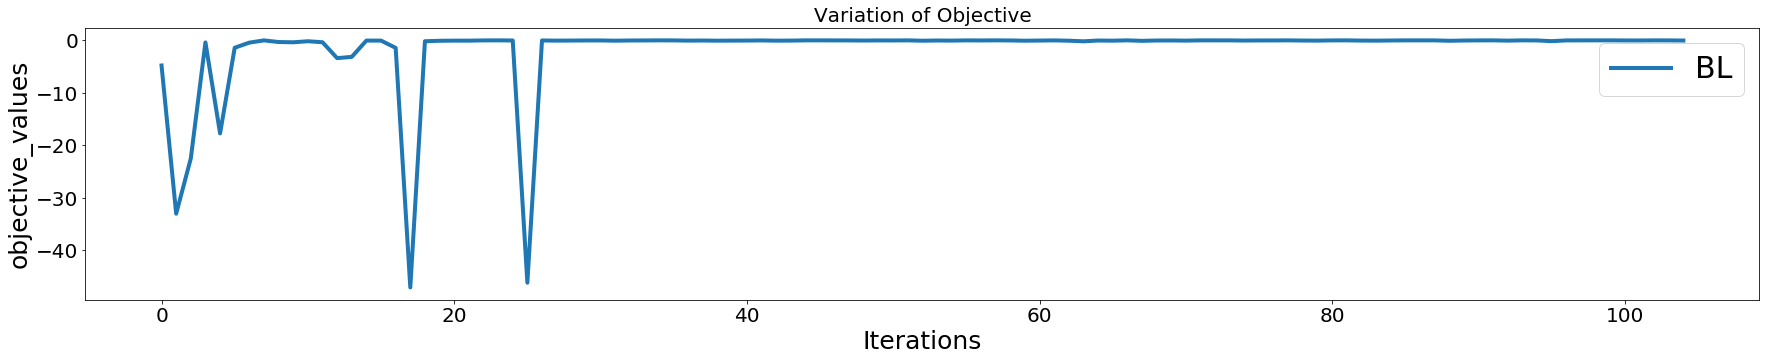

In [30]:
Size = 2000

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(30,5))
plt.title('Variation of Objective',fontsize=20)
plt.plot(results['objective_values'][:Size],lw=4,label='BL')
plt.xlabel('Iterations', fontsize=25)
plt.ylabel('objective_values',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(prop={'size': 30})
plt.show()

# Plotting the variation in the max objective

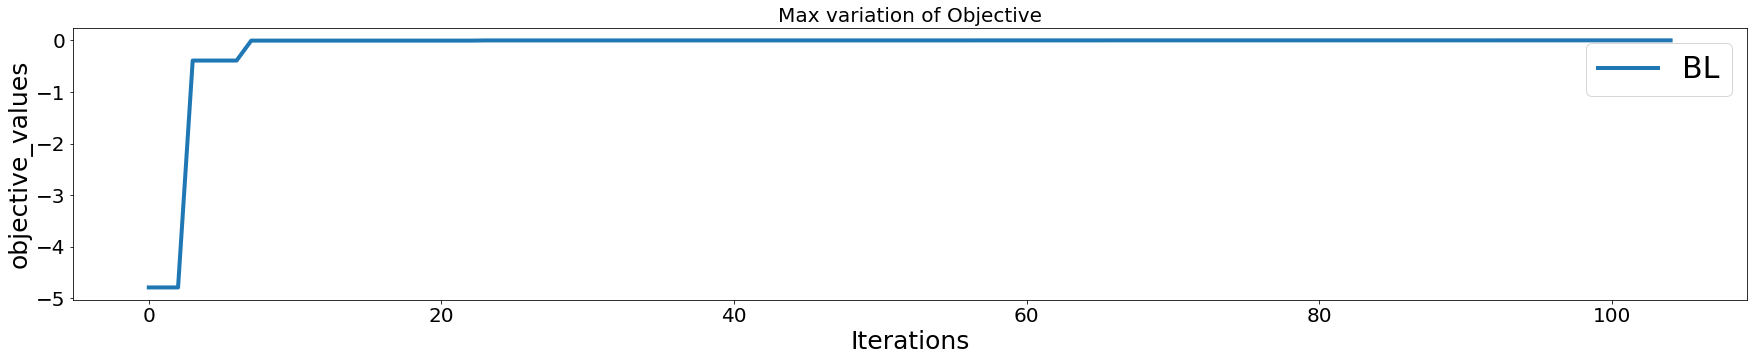

In [31]:
Size = 201 

import numpy as np

results_obj = np.array(results['objective_values'])

y_max=[]
for i in range(results_obj.shape[0]):
    y_max.append(np.max(results_obj[:i+1]))

from matplotlib import pyplot as plt
fig = plt.figure(figsize=(30,5))
plt.title('Max variation of Objective',fontsize=20)
plt.plot(y_max[:Size],lw=4,label='BL')
plt.xlabel('Iterations', fontsize=25)
plt.ylabel('objective_values',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(prop={'size': 30})
plt.show()

# See the entire results

In [33]:
import pprint
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(results)

{   'best_objective': -0.0008597337374364275,
    'best_params': {'x': -0.004202579384698701, 'y': -0.029018477974417145},
    'objective_values': [   -4.788830235780832,
                            -33.003728847552615,
                            -22.475335063932633,
                            -0.39220563628264615,
                            -17.711187172128685,
                            -1.407331368832069,
                            -0.43291579705134586,
                            -0.0059006321957677885,
                            -0.317879968883069,
                            -0.3687548839526486,
                            -0.1696699783398413,
                            -0.3605483901621138,
                            -3.3865584340023123,
                            -3.1425137517957626,
                            -0.04302957517166767,
                            -0.047224139636896235,
                            -1.4338886254428818,
                            -47.0399627

# See the values tried

In [34]:
XY=[]
for par in results['params_tried']:
    x = par['x']
    y = par['y']
    XY.append([x,y])

In [35]:
XY= np.array(XY)

In [36]:
print(XY)

[[ 1.30669726e+00 -1.75538386e+00]
 [ 3.42449226e+00  4.61265451e+00]
 [ 3.65126345e+00 -3.02384033e+00]
 [-2.88598941e-01 -5.55802382e-01]
 [ 4.10586920e+00 -9.23593699e-01]
 [ 1.27310282e-01 -1.17945897e+00]
 [ 3.12689768e-01 -5.78913557e-01]
 [-3.19637451e-02 -6.98494896e-02]
 [-4.52361468e-01  3.36524993e-01]
 [-6.06463382e-01 -3.09362195e-02]
 [ 4.04814521e-01  7.61260929e-02]
 [ 2.66317418e-01  5.38166724e-01]
 [-1.67914878e+00  7.53005855e-01]
 [-1.44977229e+00 -1.02013434e+00]
 [-1.81409408e-01  1.00599213e-01]
 [ 1.81636572e-01  1.19299184e-01]
 [-1.58543935e-01  1.18690878e+00]
 [-4.95876893e+00 -4.73820361e+00]
 [-8.60384670e-02  4.00739362e-01]
 [-5.38690789e-02 -2.83613007e-01]
 [-2.17163774e-01 -8.24167151e-02]
 [ 2.26915437e-01 -8.27200743e-02]
 [-5.36247511e-02 -8.75290212e-02]
 [-2.30064509e-02  4.25819454e-02]
 [ 7.77217582e-02  1.38060683e-01]
 [-4.75101363e+00  4.85447501e+00]
 [-1.36320605e-01  1.30225725e-02]
 [ 1.73915813e-01 -1.59008371e-01]
 [ 1.79827994e-01  7

In [16]:
print(np.sort(XY,axis=0))

[[-4.93244656e+00 -4.98891646e+00]
 [-4.92538527e+00 -4.98723836e+00]
 [-4.92358028e+00 -4.83334781e+00]
 [-3.91149211e+00 -4.62203746e+00]
 [-3.49273269e+00 -2.60034768e+00]
 [-2.68973497e+00 -2.39059590e+00]
 [-2.11429711e+00 -2.16902201e+00]
 [-1.74464166e+00 -1.87479450e+00]
 [-7.63457341e-01 -1.36690488e+00]
 [-6.73214369e-01 -1.93158942e-01]
 [-5.18000551e-01 -1.69588219e-01]
 [-1.91573938e-01 -1.57561378e-01]
 [-1.67494748e-01 -1.54070702e-01]
 [-1.57446118e-01 -1.47318666e-01]
 [-1.48062259e-01 -1.40766076e-01]
 [-1.42222618e-01 -1.39972752e-01]
 [-1.35792581e-01 -1.29401024e-01]
 [-1.09623182e-01 -1.27399988e-01]
 [-1.09568084e-01 -1.07607055e-01]
 [-9.34924750e-02 -1.02842252e-01]
 [-8.72432940e-02 -1.00498033e-01]
 [-7.75593919e-02 -8.54031879e-02]
 [-7.51600182e-02 -7.03845539e-02]
 [-7.22951004e-02 -6.62801477e-02]
 [-6.10580278e-02 -5.57847559e-02]
 [-5.27146696e-02 -4.87348240e-02]
 [-4.37893541e-02 -4.73455893e-02]
 [-4.22566499e-02 -4.14664689e-02]
 [-4.08950903e-02 -3

In [17]:
XY.shape

(101, 2)